In [1]:
import pandas as pd

## Answer = 1

In [2]:
import numpy as np

In [3]:
from scipy import stats

In [4]:
import statistics as st

In [5]:
import matplotlib.pyplot as plt

import seaborn as sn
import statsmodels.formula.api as smf


In [6]:
from statsmodels.graphics.regressionplots import influence_plot

In [7]:
data = pd.read_csv(r"C:\Users\user\Downloads\delivery_time.csv")

In [8]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [9]:
data = data.rename(columns = {'Delivery Time': 'Delivery' , 'Sorting Time' :'Sorting'} )

In [10]:
data

,Delivery,Sorting
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [11]:
data.head()

,Delivery,Sorting
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [12]:
data_new = np.log(data)

In [13]:
data_new

,Delivery,Sorting
0,3.044522,2.302585
1,2.602690,1.386294
2,2.983153,1.791759
3,3.178054,2.197225
4,3.367296,2.302585
5,2.731115,1.791759
6,2.944439,1.945910
7,2.251292,1.098612
8,2.884801,2.302585
9,2.931194,2.197225


In [14]:
data_new.corr()

,Delivery,Sorting
Delivery,1.000000,0.878727
Sorting,0.878727,1.000000


In [15]:
data_new.isnull().sum()

Delivery    0
Sorting     0
dtype: int64

In [16]:
data_new.shape

(21, 2)

In [17]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Delivery  21 non-null     float64
 1   Sorting   21 non-null     float64
dtypes: float64(2)
memory usage: 464.0 bytes


C:\Users\user\AppData\Local\Temp\ipykernel_3208\3105862250.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data_new)


Text(0, 0.5, 'Delivery')

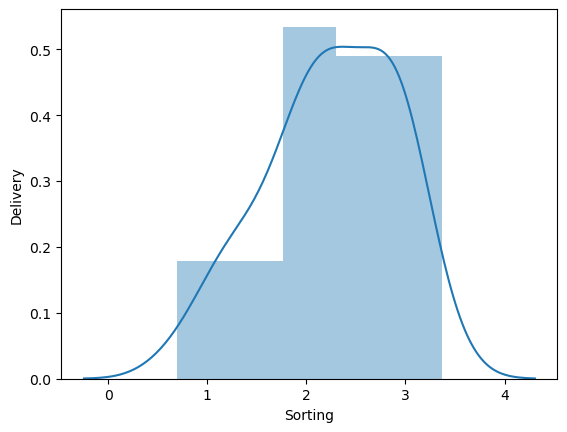

In [18]:
sn.distplot(data_new)
plt.xlabel('Sorting')
plt.ylabel('Delivery')

In [19]:
## create a linear regression model

data_new.head()

,Delivery,Sorting
0,3.044522,2.302585
1,2.602690,1.386294
2,2.983153,1.791759
3,3.178054,2.197225
4,3.367296,2.302585


In [20]:
data_new.value_counts()

Delivery  Sorting 
2.079442  0.693147    1
2.884801  2.302585    1
3.178054  2.197225    1
3.068053  1.609438    1
3.044522  2.302585    1
2.987196  2.079442    1
2.983153  1.791759    1
2.944439  1.945910    1
2.931194  2.197225    1
2.896464  1.945910    1
2.880882  1.945910    1
2.251292  1.098612    1
2.814210  1.945910    1
2.731115  1.791759    1
2.700018  1.386294    1
2.621039  1.791759    1
2.602690  1.386294    1
2.487404  1.098612    1
2.442347  1.098612    1
2.374906  1.386294    1
3.367296  2.302585    1
dtype: int64

In [21]:
data_new['Delivery']

0     3.044522
1     2.602690
2     2.983153
3     3.178054
4     3.367296
5     2.731115
6     2.944439
7     2.251292
8     2.884801
9     2.931194
10    2.987196
11    2.374906
12    2.814210
13    2.442347
14    2.487404
15    2.700018
16    2.621039
17    2.896464
18    2.079442
19    2.880882
20    3.068053
Name: Delivery, dtype: float64

In [22]:


models = smf.ols("Delivery~Sorting" , data = data_new).fit()

In [23]:
models

<Axes: xlabel='Sorting', ylabel='Delivery'>

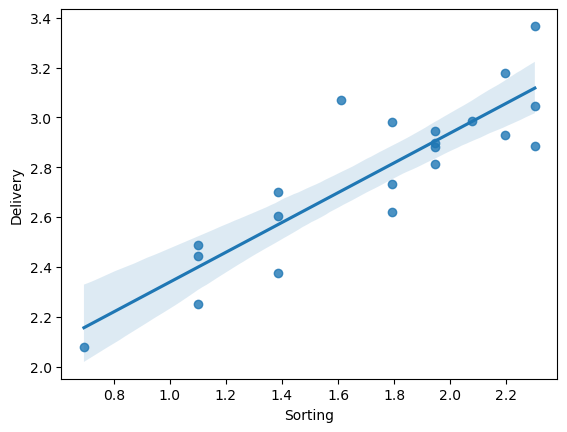

In [24]:
sn.regplot(x = "Sorting" , y = "Delivery" , data = data_new)

In [25]:
## calculate the r_squared value and the r_squared_adj
## calculate the p_value and t_value

In [26]:
models.params

Intercept    1.741987
Sorting      0.597522
dtype: float64

In [27]:
print(models.rsquared , models.rsquared_adj)

0.77216134926874 0.7601698413355158


In [28]:
print(models.tvalues , '\n' , models.pvalues)

Intercept    13.085552
Sorting       8.024484
dtype: float64 
 Intercept    5.921137e-11
Sorting      1.601539e-07
dtype: float64


In [29]:
models.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Delivery   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Thu, 17 Aug 2023   Prob (F-statistic):           1.60e-07
Time:                        19:17:29   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7420      0.133     13.086      0.000       1.463       2.021
Sorting        0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

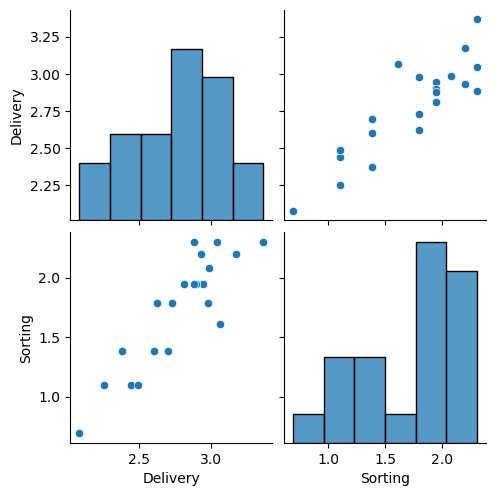

In [52]:
sn.pairplot(data_new)

## Answer = 2

In [30]:
datasets = pd.read_csv(r"C:\Users\user\Downloads\Salary_Data.csv")

In [31]:
datasets

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [32]:
datasets_new = np.log(datasets)

In [33]:
datasets_new.head()

,YearsExperience,Salary
0,0.095310,10.580073
1,0.262364,10.740843
2,0.405465,10.538237
3,0.693147,10.681091
4,0.788457,10.593906


In [34]:
datasets_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [35]:
datasets_new.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [36]:
datasets_new.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.951428
Salary,0.951428,1.000000


C:\Users\user\AppData\Local\Temp\ipykernel_3208\176766255.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(datasets_new)


Text(0, 0.5, 'Salary')

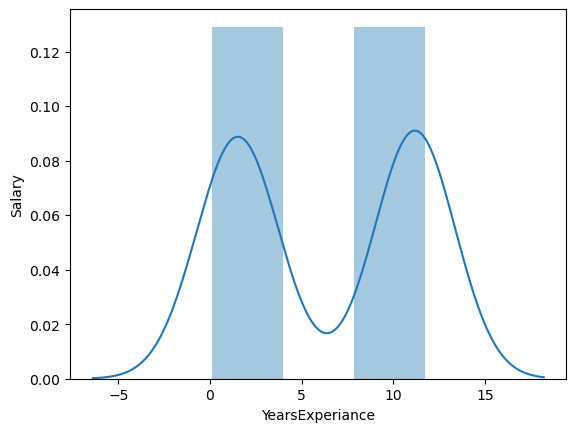

In [37]:
sn.distplot(datasets_new)
plt.xlabel('YearsExperiance')
plt.ylabel('Salary')

In [38]:
datasets_new.head()

,YearsExperience,Salary
0,0.095310,10.580073
1,0.262364,10.740843
2,0.405465,10.538237
3,0.693147,10.681091
4,0.788457,10.593906


In [39]:
## build a model

df3 = datasets_new.rename(columns = {"YearsExperience" : "Exp" , "Salary" : "Salary"})

In [40]:
df3

,Exp,Salary
0,0.095310,10.580073
1,0.262364,10.740843
2,0.405465,10.538237
3,0.693147,10.681091
4,0.788457,10.593906
5,1.064711,10.944506
6,1.098612,11.004597
7,1.163151,10.904946
8,1.163151,11.073567
9,1.308333,10.954117


In [41]:
datasets_new = df3

In [42]:
df3.head()

,Exp,Salary
0,0.095310,10.580073
1,0.262364,10.740843
2,0.405465,10.538237
3,0.693147,10.681091
4,0.788457,10.593906


In [43]:
models1 = smf.ols("Salary~Exp" , data = df3).fit()

In [44]:
models1

<Axes: xlabel='Exp', ylabel='Salary'>

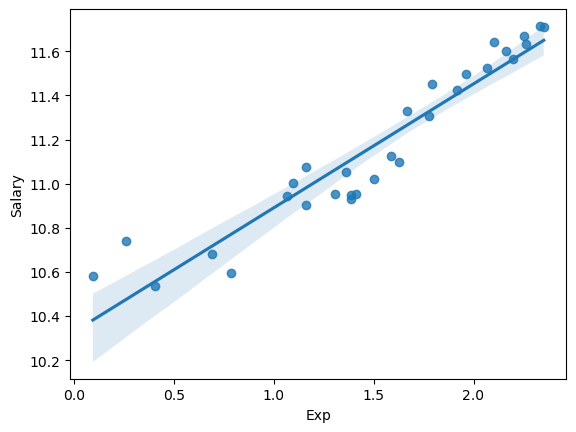

In [45]:
sn.regplot(x = 'Exp' , y = 'Salary' , data = df3)

In [46]:
models1.params

Intercept    10.328043
Exp           0.562089
dtype: float64

In [47]:
print(models1.rsquared , models1.rsquared_adj)

0.905215072581715 0.9018298966024905


In [48]:
print(models1.tvalues , '\n' , models1.pvalues)

Intercept    184.867959
Exp           16.352542
dtype: float64 
 Intercept    9.073132e-45
Exp          7.395278e-16
dtype: float64


In [49]:
models1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Thu, 17 Aug 2023   Prob (F-statistic):           7.40e-16
Time:                        19:17:52   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3280      0.056    184.868      0.000      10.214      10.442
Exp            0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
import seaborn as sn

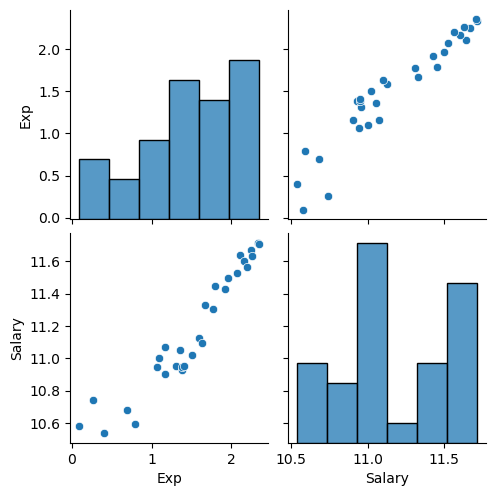

In [51]:
sn.pairplot(df3)